In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

file_path = '/content/gdrive/MyDrive/heart_failure data.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
data= pd.read_csv(file_path)
data.head(5)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Step 1: Problem Definition

Define the objective clearly. Understand the business problem or the research
question you're trying to answer. This ensures the analysis is aligned with the
goal.

**Our objective is to understand what is causing a Death Event. By understanding what causes a Death Event it may help put a focus and emphasis on that specific issue. Understanding what causes Death Events can ultimately help reduce the number of Death Events.**

Define the type of task you want to perform: Regression/ Classification/Clustering
and why?

**We will perform a classification analysis to determine how the independent variables serum creatinine, platelets, ejection fraction, serum sodium, and creatinine phosphokinase, impact the dependent variable Death Event. We are doing this to determine what events determine the change of a death event.**




# Step 2: Exploratory Data Analysis (EDA)

In [ ]:
#summary statistics
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
data.shape

(299, 13)

In [ ]:
# Import necessary libraries
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())


import matplotlib.pyplot as plt

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None

In [ ]:
# Detect Missing Values
missing_values = data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


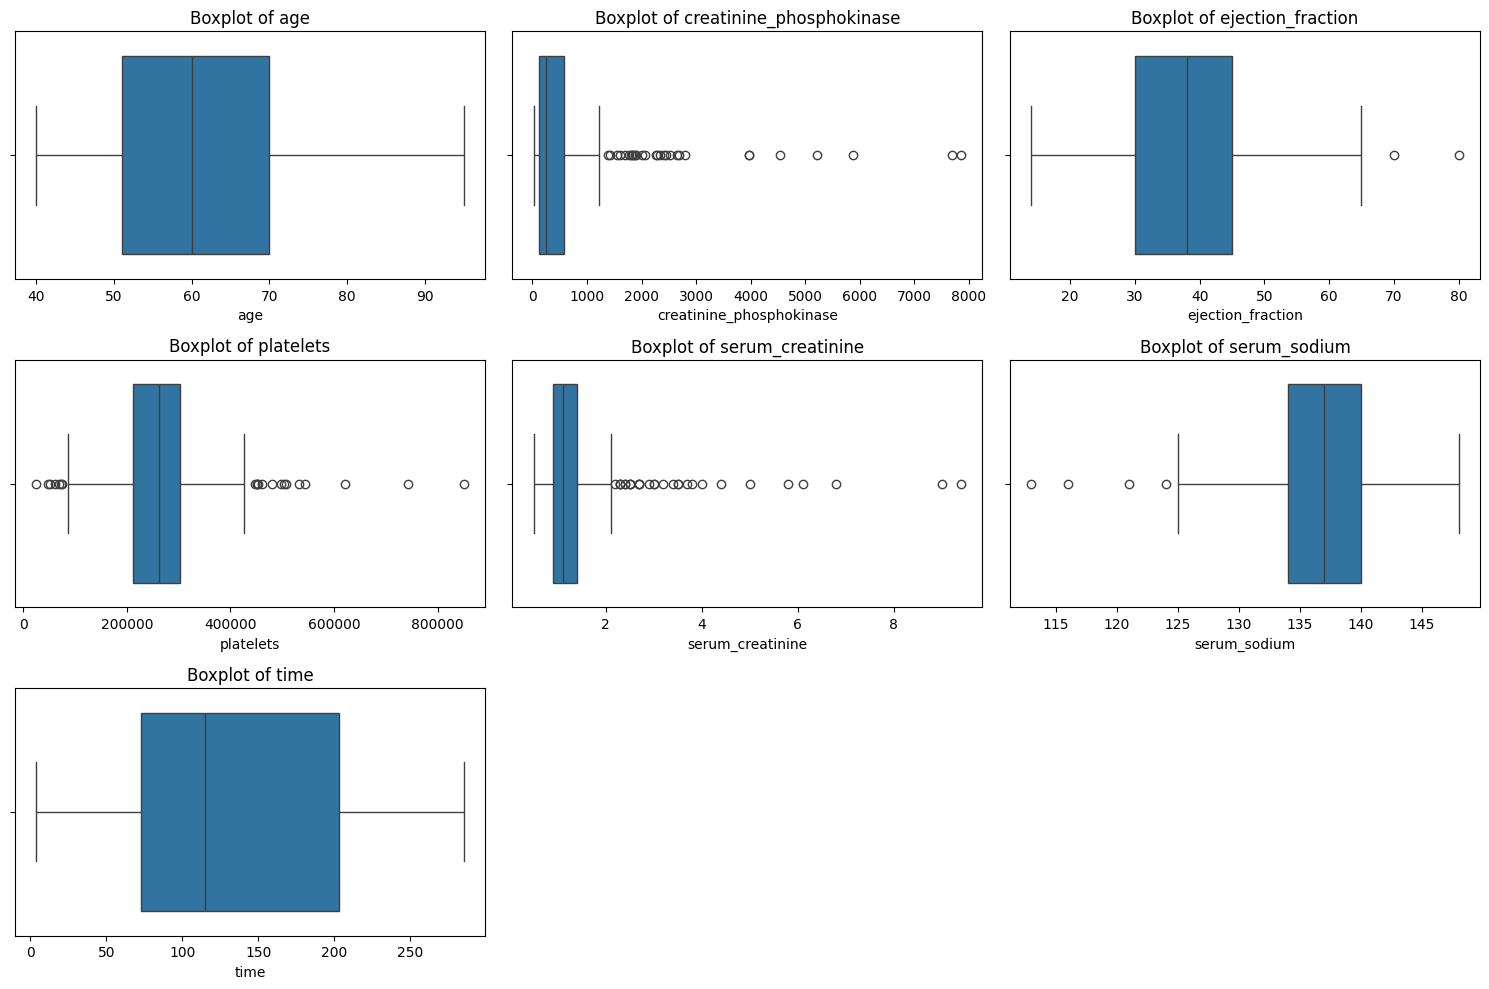

In [ ]:
# Detect Outliers Using Boxplots for Numerical Features
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                      'platelets', 'serum_creatinine', 'serum_sodium', 'time']
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[feature])
    plt.title(f"Boxplot of {feature}")
plt.xlabel(feature)
plt.tight_layout()
plt.show()

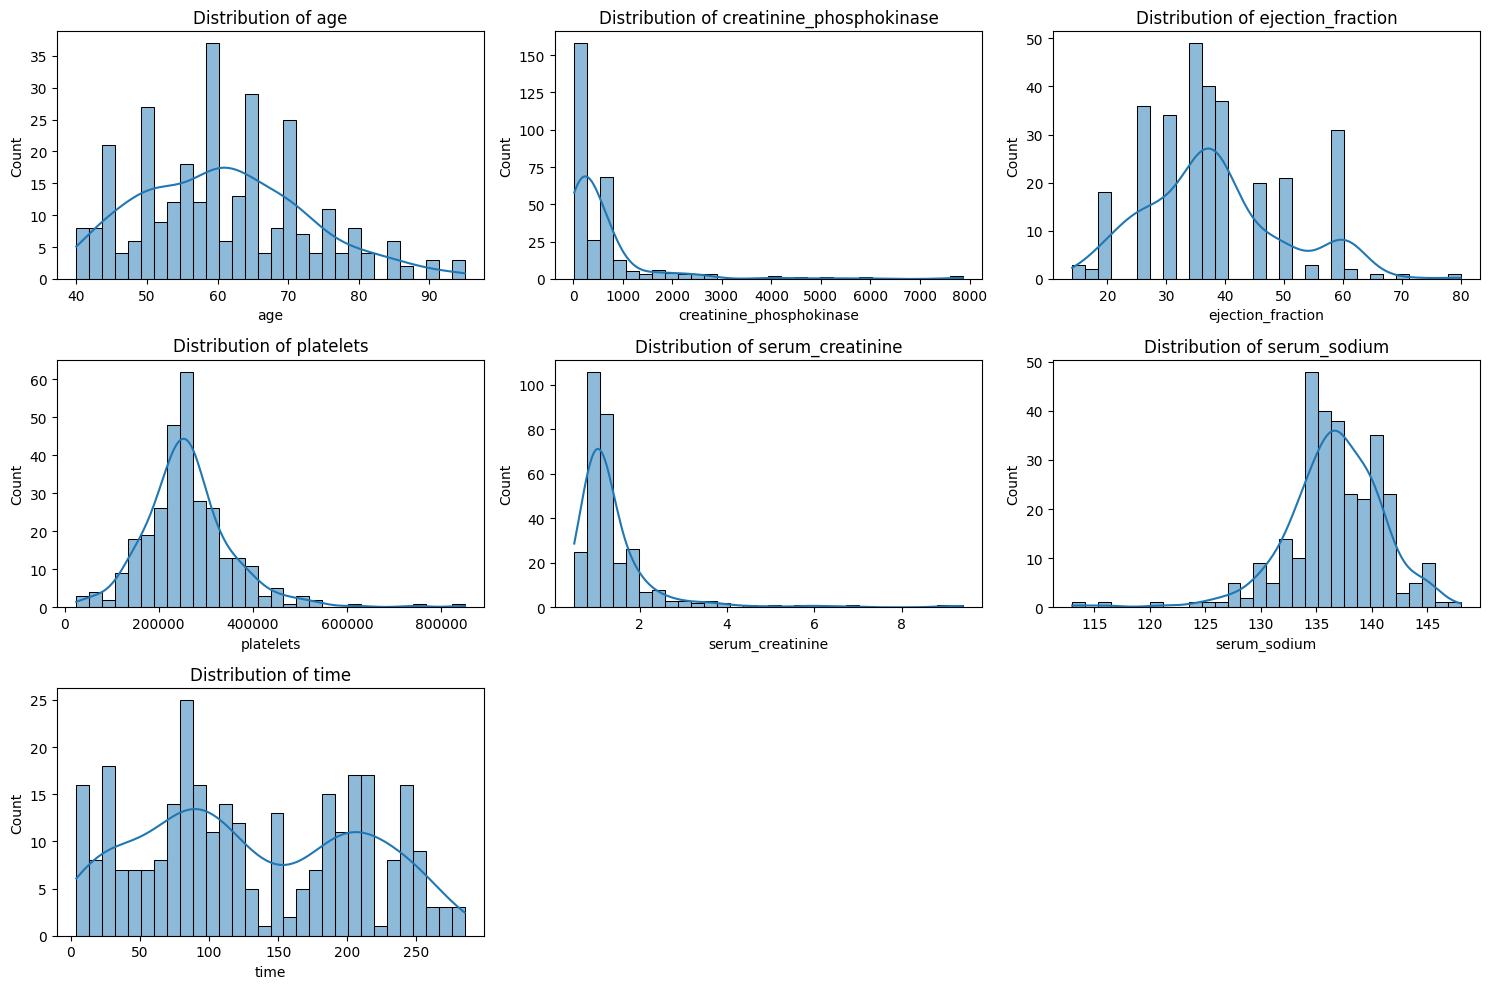

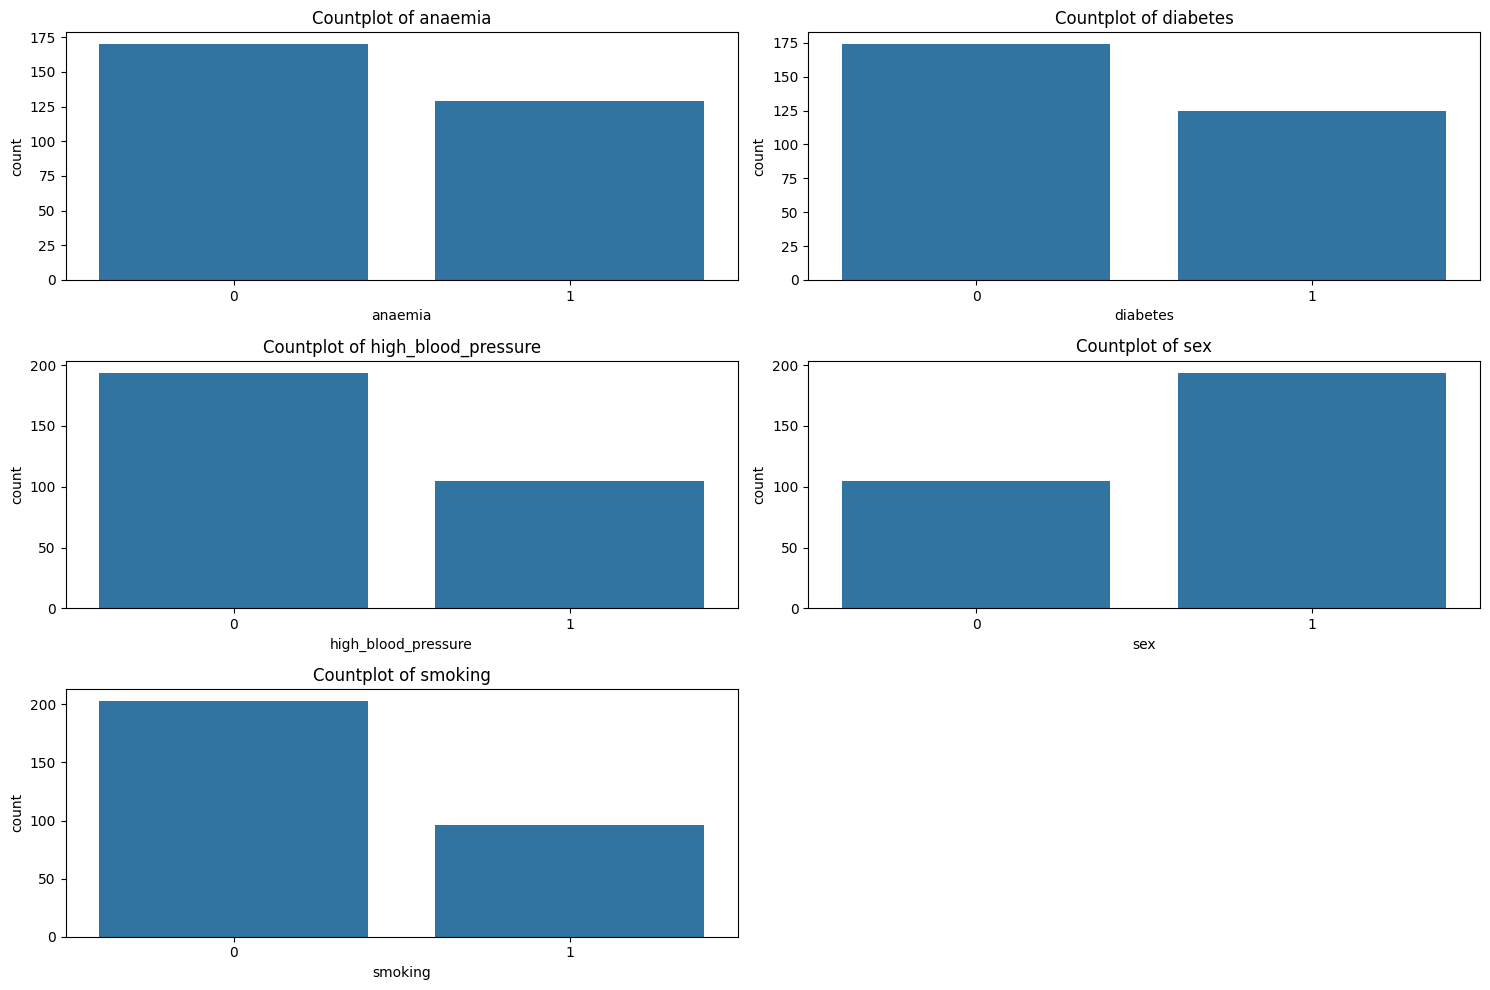

In [ ]:
# Visualize Distributions of Numerical Features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

# Visualize Counts of Categorical Features
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features[:-1], 1):  # Exclude DEATH_EVENT for now
    plt.subplot(3, 2, i)
    sns.countplot(x=data[feature])
    plt.title(f"Countplot of {feature}")
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

feature selection:

In [ ]:
#hypotheses for futher analysis

Null Hypothesis (H₀):
There is no significant relationship between the categories (features such as age, anaemia, creatinine phosphokinase, diabetes, etc.) and the likelihood of a Death Event.

Alternative Hypothesis (H₁):
At least one of the categories (features) significantly impacts the likelihood of a Death Event.

**Feature Classification:**

age: Numerical Continuous

anaemia: Categorical Nominal

creatinine_phosphokinase: Numerical Continuous

diabetes: Categorical Nominal

ejection_fraction: Numerical Discrete

high_blood_pressure: Categorical Nominal

platelets: Numerical Continuous

serum_creatinine: Numerical Continuous

serum_sodium: Numerical Continuous

sex: Categorical Nominal

smoking: Categorical Nominal

time: Numerical Time Series

DEATH_EVENT: Categorical Nominal

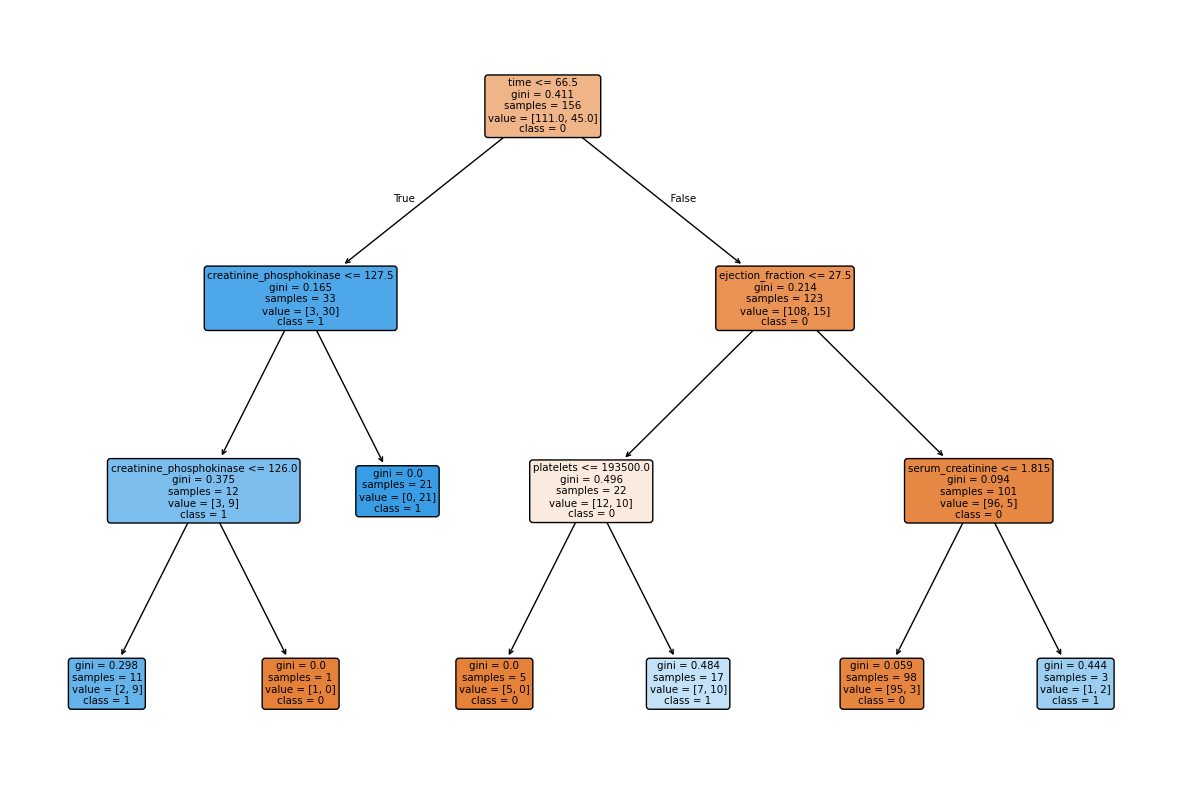

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Fit decision tree classifier
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)

feature_names = X_train.columns
# Convert class names to strings
class_names = [str(cls) for cls in clf.classes_]

# Plot the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf,
               filled=True,
               feature_names=feature_names,
               class_names=class_names,  # Use the converted class names
               rounded=True)
plt.show()

If time ≤ 67.5, the samples are sent to the left branch.
If time > 67.5, the samples are sent to the right branch.

Left branch 1:
If ejection fraction ≤ 72.5, the samples are further split into the next level.
If ejection fraction > 72.5, only one patient is classified, with no death event (class 0).

Left branch 2:
If creatinine phosphokinase ≤ 109.5, the samples are split further.
If creatinine phosphokinase > 109.5, there is a strong majority of no death events (class 0)

Right branch 1:
If serum creatinine ≤ 1.815, the majority of patients experience no death events (class 0).
If serum creatinine > 1.815, there’s a higher proportion of death events, leading to further splits.

Right branch 2:
If platelets ≤ 90,000, the data splits again based on serum sodium.
If platelets > 90,000, the model predicts no death events (class 0) with very high confidence (low Gini index of 0.093).

Right branch 3:
If serum sodium ≤ 132.5, the risk of a death event (class 1) is high.
If serum sodium > 132.5, the risk of a death event is lower.


## Step 3: Data Preprocessing

In [ ]:
# Load the dataset
data = pd.read_csv(file_path)

# 1. Detect Missing Values
print("Missing Values in Each Column:")
missing_values = data.isnull().sum()
print(missing_values)

Missing Values in Each Column:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [ ]:
# 2. Handle Duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# If duplicates exist, remove them
data = data.drop_duplicates()


Number of duplicate rows: 0


In [ ]:
# 3. Detect and Handle Outliers
# Use IQR to filter out outliers in numerical features
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                      'platelets', 'serum_creatinine', 'serum_sodium', 'time']

for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    outliers_removed = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

    print(f"\nFeature: {feature}")
    print(f"Outliers removed: {len(data) - len(outliers_removed)}")

    # Update the dataset by removing outliers
    data = outliers_removed


Feature: age
Outliers removed: 0

Feature: creatinine_phosphokinase
Outliers removed: 29

Feature: ejection_fraction
Outliers removed: 2

Feature: platelets
Outliers removed: 18

Feature: serum_creatinine
Outliers removed: 23

Feature: serum_sodium
Outliers removed: 3

Feature: time
Outliers removed: 0



Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       224 non-null    float64
 1   anaemia                   224 non-null    int64  
 2   creatinine_phosphokinase  224 non-null    int64  
 3   diabetes                  224 non-null    int64  
 4   ejection_fraction         224 non-null    int64  
 5   high_blood_pressure       224 non-null    int64  
 6   platelets                 224 non-null    float64
 7   serum_creatinine          224 non-null    float64
 8   serum_sodium              224 non-null    int64  
 9   sex                       224 non-null    int64  
 10  smoking                   224 non-null    int64  
 11  time                      224 non-null    int64  
 12  DEATH_EVENT               224 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 24.5 KB


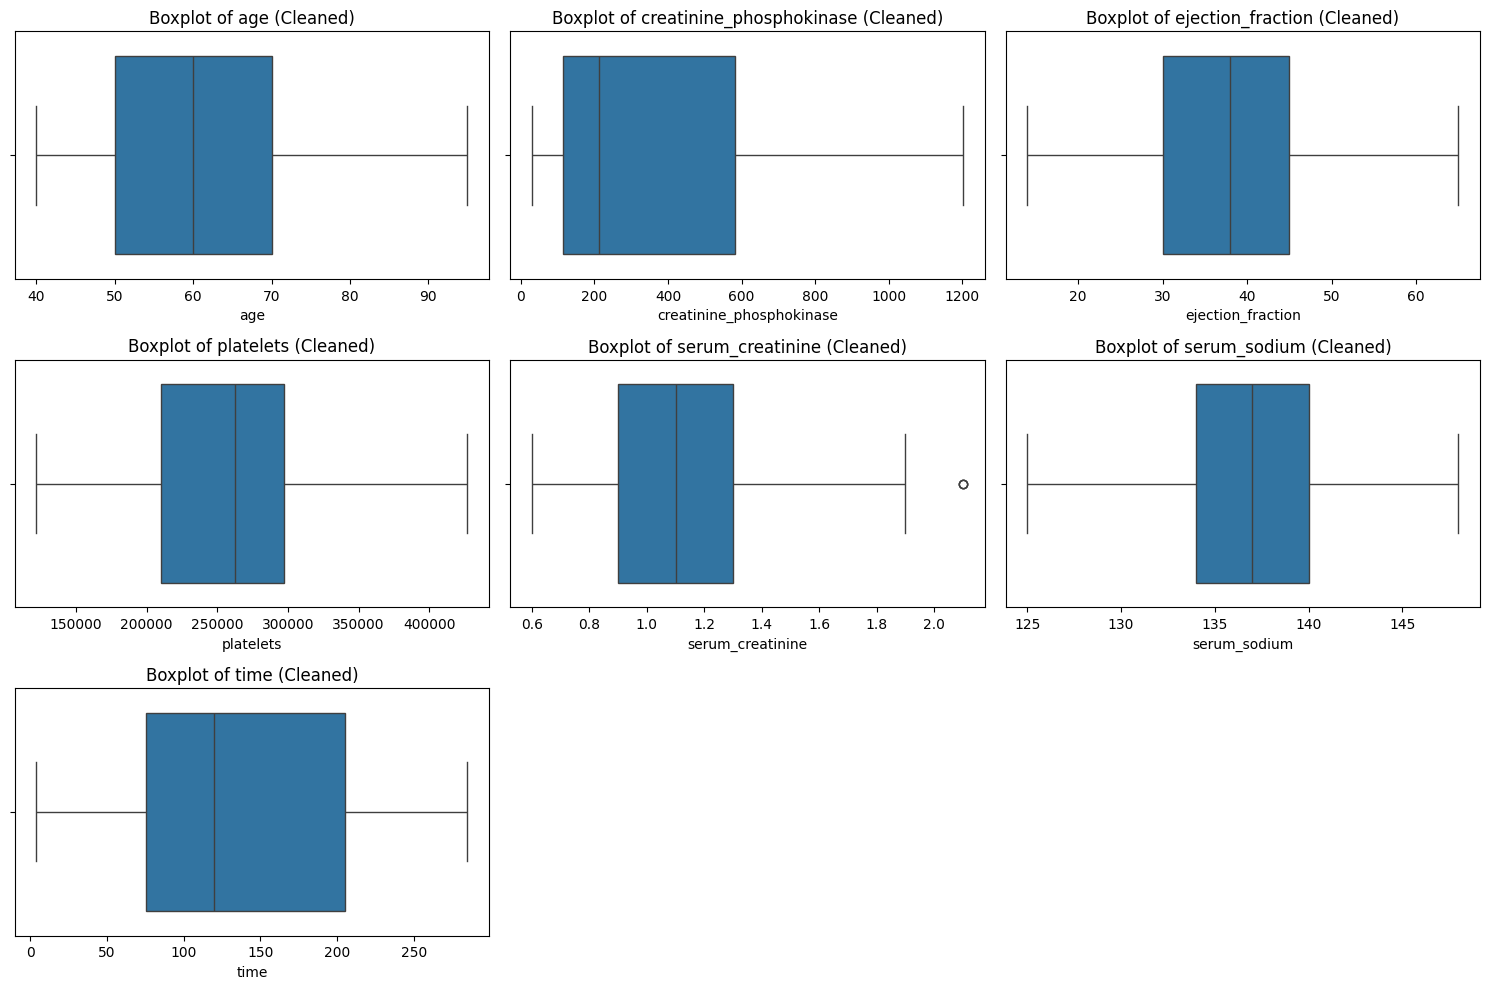

In [ ]:
# 4. Check for Erroneous Data (e.g., negative values where not applicable)
for feature in numerical_features:
    if (data[feature] < 0).any():
        print(f"Erroneous data found in {feature}")

# Display cleaned dataset info
print("\nCleaned Dataset Info:")
print(data.info())

# Visualize to confirm cleaning process
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[feature])
    plt.title(f"Boxplot of {feature} (Cleaned)")
plt.tight_layout()
plt.show()

In [ ]:
# Feature Engineering: Create new features or variables that may improve the model
# Example: Create a feature for age group
data['age_group'] = pd.cut(data['age'], bins=[0, 50, 70, 100], labels=['young', 'middle_aged', 'old'])

# Encode the new feature
age_group_encoded = pd.get_dummies(data['age_group'], drop_first=True)

# Concatenate with the original dataset
data = pd.concat([data.drop(columns=['age_group']), age_group_encoded], axis=1)

print("Feature Engineered Data:")
print(data.head())

Feature Engineered Data:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
5  90.0        1                        47         0                 40   
6  75.0        1                       246         0                 15   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1   265000.0               1.9           130    1   
2                    0   162000.0               1.3           129    1   
3                    0   210000.0               1.9           137    1   
5                    1   204000.0               2.1           132    1   
6                    0   127000.0               1.2           137    1   

   smoking  time  DEATH_EVENT  middle_aged    old  
0        0     4           

## Step 4: Feature Selection


In [ ]:
from sklearn.model_selection import train_test_split

# Define features
X = data.drop(['DEATH_EVENT'],axis=1)
y = data['DEATH_EVENT']


## Step 5: Modeling

In [ ]:
# Split the data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Show the shape of the resulting datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (156, 14), y_train shape: (156,)
X_test shape: (68, 14), y_test shape: (68,)


In [ ]:
# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

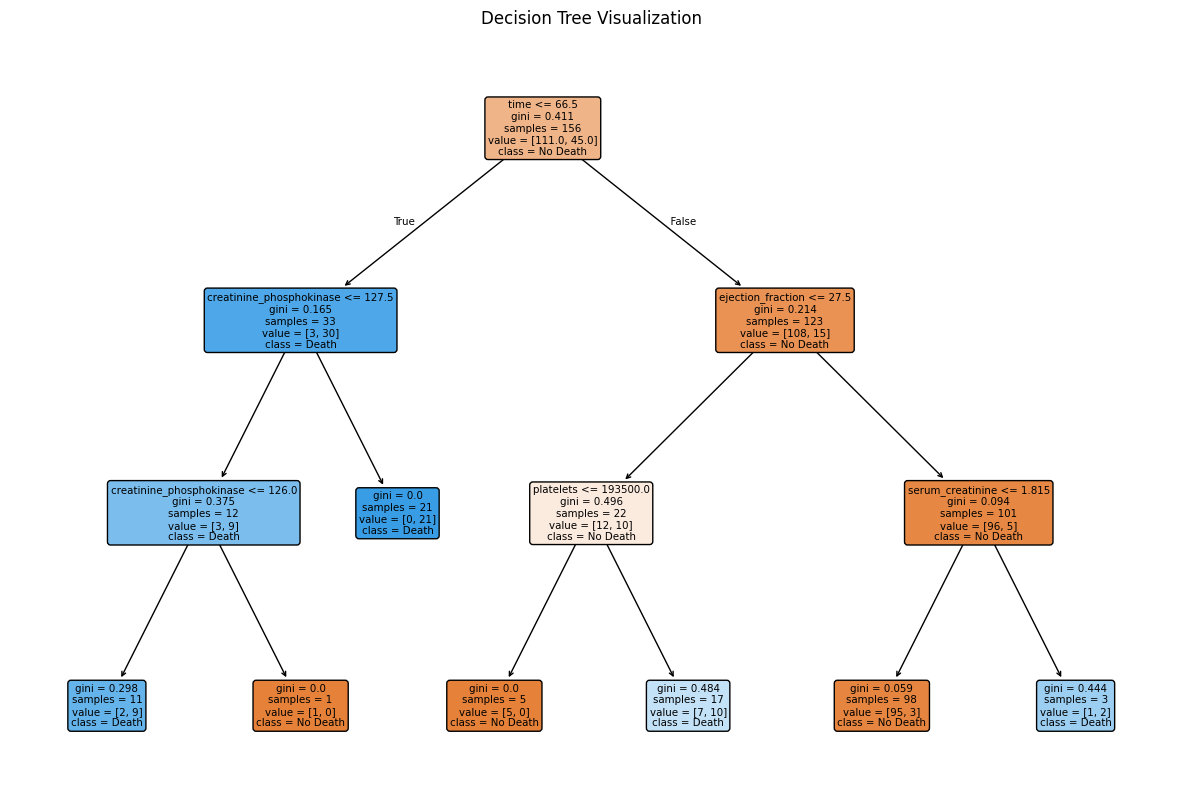

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Death', 'Death'], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        52
           1       0.56      0.62      0.59        16

    accuracy                           0.79        68
   macro avg       0.72      0.74      0.73        68
weighted avg       0.80      0.79      0.80        68



## Step 6: Model Evaluation

Confusion Matrix

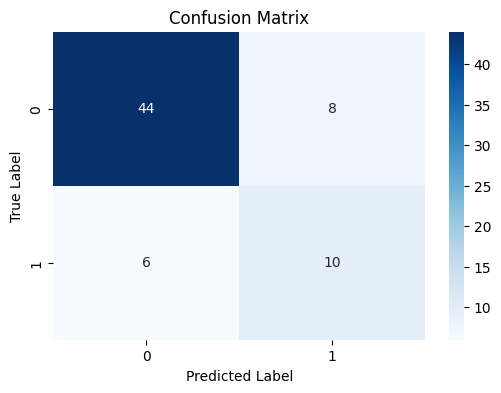

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = clf.predict(X_test)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to display the binary confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


Accuracy Matrix

In [ ]:
#Accuracy Metric
from sklearn.metrics import accuracy_score

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")



Model Accuracy: 0.79


ROC-AUC

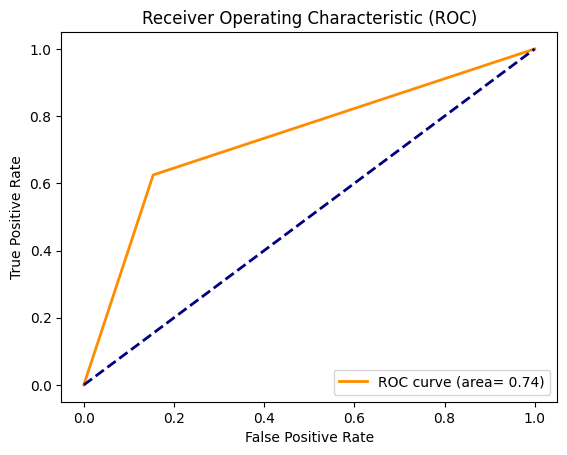

In [ ]:
#ROC-AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_pred = clf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color= 'darkorange', lw=2, label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Cross Validation

In [ ]:
#Cross Validation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Instead of calling data as a function, use indexing to get X and y
X = data.drop('DEATH_EVENT', axis=1)  # Features (all columns except 'DEATH_EVENT')
y = data['DEATH_EVENT']  # Target variable

clf = DecisionTreeClassifier(random_state=42)
k_folds = KFold(n_splits=5)

scores = cross_val_score(clf, X, y, cv=k_folds)
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())



Cross Validation Scores: [0.46666667 0.68888889 0.8        0.73333333 0.84090909]
Average CV Score: 0.7059595959595959


# Step 7: Model Interpretation and Insights

Model Interpretation

ROC AUC Score (0.69):
Indicates the model has moderate to good discrimination ability.
In the context of predicting mortality in heart failure, this performance may not be sufficient, as misclassification could have serious consequences.

Confusion Matrix Insights:
17 false negatives highlight the model's struggle to identify patients at risk of death.
Missing true death events could lead to a lack of timely interventions in real-world scenarios.

Feature Importance and Predictions:
Serum creatinine and ejection fraction align with medical understanding of heart failure risk.
The model correctly identifies some high-risk patients (20 true positives), suggesting it captures certain key patterns in the data.
However, variability in features like platelets and serum sodium may reduce precision, impacting the model's reliability.

Contextual Alignment:
In a healthcare setting, high false negatives mean some patients may not receive the attention or care they need.
The model's current accuracy and bias toward true negatives suggest it might be more conservative in predicting but risks missing some cases.

Next Steps for Contextual Improvement:
Reduce false negatives to minimize the risk of missed diagnoses.